# Mobile Price Range Clustering and Classfication

### Importing Libraries

In [1]:
# import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid = False)

In [3]:
# reding the csv file

dataframe = pd.read_csv("Mobile Dataset.csv")
dataframe

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
dataframe.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
#describing dataframe

dataframe.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
# independent data (selecting only integral and float values because k means doesn't perform well on categorical data.)

x = dataframe.iloc[:,[0,2,4,6,7,8,9,10,11,12,13,14,15,16]].values
x

array([[8.420e+02, 2.200e+00, 1.000e+00, ..., 9.000e+00, 7.000e+00,
        1.900e+01],
       [1.021e+03, 5.000e-01, 0.000e+00, ..., 1.700e+01, 3.000e+00,
        7.000e+00],
       [5.630e+02, 5.000e-01, 2.000e+00, ..., 1.100e+01, 2.000e+00,
        9.000e+00],
       ...,
       [1.911e+03, 9.000e-01, 1.000e+00, ..., 9.000e+00, 1.000e+00,
        5.000e+00],
       [1.512e+03, 9.000e-01, 4.000e+00, ..., 1.800e+01, 1.000e+01,
        1.900e+01],
       [5.100e+02, 2.000e+00, 5.000e+00, ..., 1.900e+01, 4.000e+00,
        2.000e+00]])

In [7]:
# Scaling Data using Standard Scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled

array([[-0.90259726,  0.83077942, -0.76249466, ..., -0.78498329,
         0.2831028 ,  1.46249332],
       [-0.49513857, -1.2530642 , -0.99289039, ...,  1.11426556,
        -0.63531667, -0.73426721],
       [-1.5376865 , -1.2530642 , -0.53209893, ..., -0.31017108,
        -0.86492153, -0.36814045],
       ...,
       [ 1.53077336, -0.76274805, -0.76249466, ..., -0.78498329,
        -1.0945264 , -1.10039396],
       [ 0.62252745, -0.76274805, -0.07130748, ...,  1.35167167,
         0.9719174 ,  1.46249332],
       [-1.65833069,  0.58562134,  0.15908825, ...,  1.58907778,
        -0.4057118 , -1.6495841 ]])

In [8]:
# Scaling Data using MinMax Scaler

from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
x_scaled1 = mmc.fit_transform(x)
x_scaled1

array([[0.22778891, 0.68      , 0.05263158, ..., 0.28571429, 0.38888889,
        0.94444444],
       [0.34736139, 0.        , 0.        , ..., 0.85714286, 0.16666667,
        0.27777778],
       [0.04141617, 0.        , 0.10526316, ..., 0.42857143, 0.11111111,
        0.38888889],
       ...,
       [0.94188377, 0.16      , 0.05263158, ..., 0.28571429, 0.05555556,
        0.16666667],
       [0.6753507 , 0.16      , 0.21052632, ..., 0.92857143, 0.55555556,
        0.94444444],
       [0.00601202, 0.6       , 0.26315789, ..., 1.        , 0.22222222,
        0.        ]])

## Unsupervised Machine Learning Model

### Model- K Means

In [9]:
# importing the model from Sklearn

from sklearn.cluster import KMeans

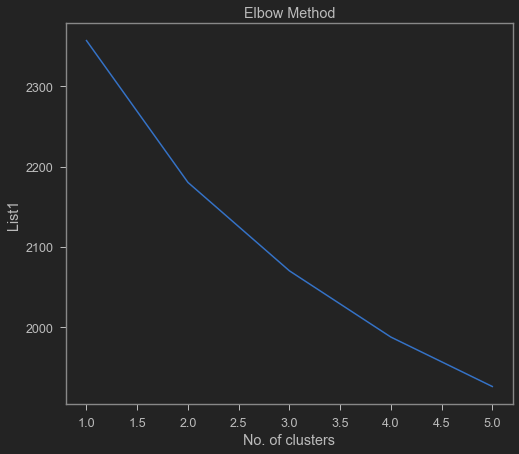

In [10]:
# using elbow method to find out the number of clusters

list1 = []
for i in range(1,6):
    model_kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 3)
    model_kmeans.fit(x_scaled1)
    list1.append(model_kmeans.inertia_)

plt.plot(range(1,6), list1)
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('List1')
plt.show()

Elbow method, from the above graph, tells us that we can select anything among 3 and 4 clusters. Selecting 4 clusters. 

In [10]:
# fitting scaled data into the model

model_kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 3)
y_kmeans = model_kmeans.fit_predict(x_scaled1)
y_kmeans

array([0, 3, 2, ..., 2, 3, 1])

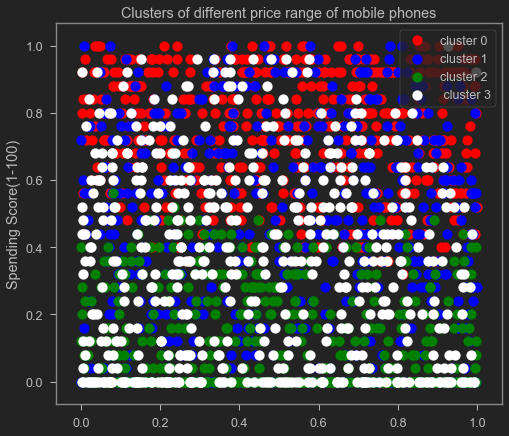

In [16]:
# visualizing clusters

plt.scatter(x_scaled1[y_kmeans == 0,0], x_scaled1[y_kmeans == 0,1], s = 100, c = 'red', label = 'cluster 0')
plt.scatter(x_scaled1[y_kmeans == 1,0], x_scaled1[y_kmeans == 1,1], s = 100, c = 'blue', label = 'cluster 1')
plt.scatter(x_scaled1[y_kmeans == 2,0], x_scaled1[y_kmeans == 2,1], s = 100, c = 'green', label = 'cluster 2')
plt.scatter(x_scaled1[y_kmeans == 3,0], x_scaled1[y_kmeans == 3,1], s = 100, c = 'white', label =' cluster 3')
plt.title('Clusters of different price range of mobile phones')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

In [26]:
#dataframe.drop(columns=['cluster_id','price_cluster'],inplace = True)

In [27]:
#dataframe

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [28]:
dataframe['cluster_id'] = y_kmeans
dataframe

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,cluster_id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,3
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,3
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,2
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,0
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,2
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,3


In [36]:
# calculating the mean of the attributes (ram, internal memory, and primary camera) for comparing the clusters

ram_cluster = pd.DataFrame(dataframe.groupby(['cluster_id']).ram.mean())
int_memory_cluster = pd.DataFrame(dataframe.groupby(['cluster_id']).int_memory.mean())
pc_cluster = pd.DataFrame(dataframe.groupby(['cluster_id']).pc.mean())
clock_speed_cluster = pd.DataFrame(dataframe.groupby(['cluster_id']).clock_speed.mean())
mean_df = pd.concat([ram_cluster,int_memory_cluster,pc_cluster,clock_speed_cluster],axis = 1)
mean_df

,ram,int_memory,pc,clock_speed
cluster_id,,,,
0,1916.062762,34.366109,8.075314,2.371967
1,2282.127349,31.419624,16.532359,1.623591
2,2066.340000,29.128000,10.358000,0.816000
3,2221.434622,33.244936,5.294659,1.335175


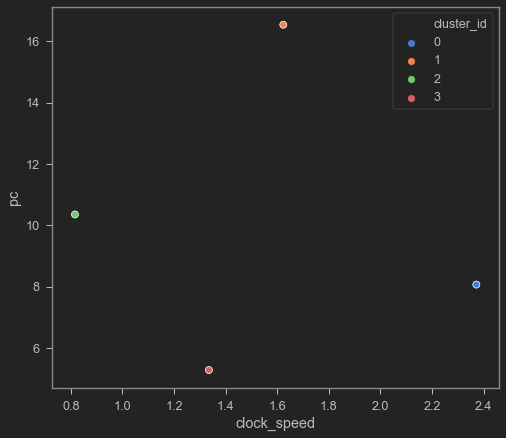

In [44]:
sns.scatterplot(x = 'clock_speed', y = 'pc', data = mean_df, hue = mean_df.index, palette = 'muted')
plt.show()

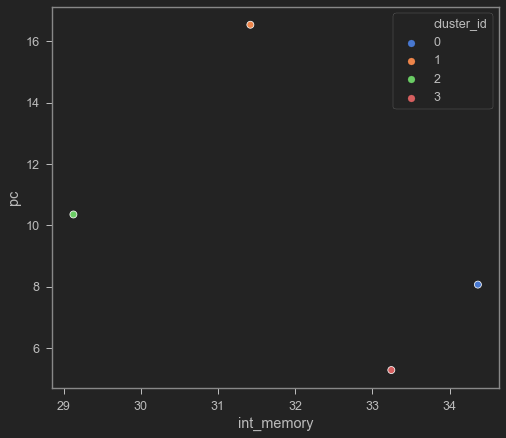

In [31]:
#plotting the graph between mean of the values to visualize the clusters

sns.scatterplot(x = 'int_memory', y = 'pc', data = mean_df, hue = mean_df.index, palette = 'muted')
plt.show()

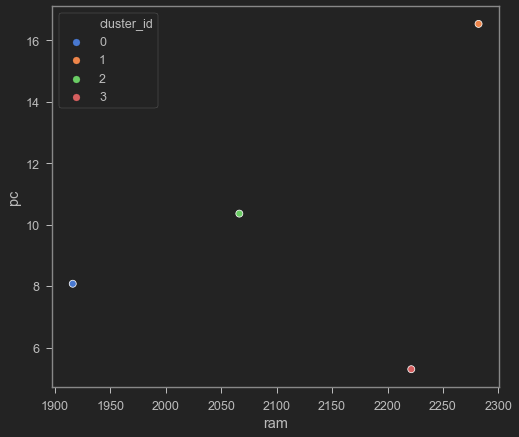

In [32]:
#plotting the graph between mean of the values to visualize the clusters

sns.scatterplot(x = 'ram', y = 'pc', data = mean_df, hue = mean_df.index, palette = 'muted')
plt.show()

### Conclusion
Cluster_id = 1 -> High-Priced Phone

Cluster_id = 2 -> Mid-Priced Phone

Cluster_id = 0 -> Low-Priced Phone

Cluster_id = 3 -> Very-Low Priced Phone